In [148]:
from sklearn.decomposition import NMF
import numpy as np
from sklearn import metrics
from sklearn.metrics.cluster import entropy,davies_bouldin_score
#from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA
import pymf3
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix

### ----------- Sauvegarde des données: bank_data, bank_labels ---------

In [3]:
f=open("bank_auth.txt","r")
data=np.loadtxt("bank_auth.txt",delimiter=",",dtype=float)
df=data
f.close()
bank_data=[]
bank_labels=[]
bank_data=data[:,:4]
bank_labels=data[:,4]

### ----------- Création des données: A_faux, A_vrais ---------

A_faux=[]
A_vrais=[]
a=float(0)
n=len(bank_labels)
for i in range(n):
    if(bank_labels[i]==a):
               A_faux.append(bank_data[i])
    else:
        A_vrais.append(bank_data[i])

### ----------- Création des données: bank_train, bank_test ---------

In [7]:
bank_test=[]
bank_train=[]
for i in range(500):
         bank_train.append(A_vrais[i])
for i in range(600):
        bank_train.append(A_faux[i])
i=500
n=len(A_vrais)
for i in range(500,n):
        bank_test.append(A_vrais[i])
n=len(A_faux)
for i in range(600,n):
        bank_test.append(A_faux[i])
bank_test = np.asarray(bank_test)
bank_train=np.asarray(bank_train)

### -------------- Visualisations des données  --------------

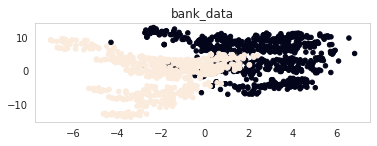

<Figure size 432x288 with 0 Axes>

In [10]:
pca = PCA(n_components=2)
w=bank_train
principalComponents = pca.fit_transform(w)
fig=plt.figure()
ax=plt.axes()
plt.subplot(211)
plt.scatter(bank_data[:,0],bank_data[:,1],s=20,c=bank_labels)
plt.title('bank_data')
plt.show()
plt.savefig('bank_data')

def affiche(w,h,name):
        fig=plt.figure()
        ax=plt.axes()
        plt.scatter(w,h)
        plt.title(name)

In [11]:
# -------------semi-NMF----------------------------------
def se(data):
    mdl=pymf3.semiNMF(bank_train.T,num_bases=2)
    #mdl=snmf.SNMF(bank_train.T,num_base=2)
    #mettre que les elts de bank_train 
    mdl.factorize(niter=1000)
    #print(mdl.W)
    return mdl

In [12]:
#---------------application de la semi-NMF: se---------------
semdl=se(bank_train)
W_train=semdl.W
H_train=semdl.H
H_trainT=H_train.T

In [15]:
# ------------ Visualisation des clusters ---------------
def show_clusters(w):
    b=np.max(w,axis=1)
    for i in range(0,w.shape[0]):
        for j in range(0,w.shape[1]):
            if b[i] ==w[i,j]:
                w[i,j]=1
            else:
                w[i,j]=0
    return w                   
H_trains=show_clusters(H_trainT)
H_trains

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [16]:
#------- fonction qui recupere la seconde colonne d'une matrice ---------------
def prendre_second(w):
    n=len(w)
    res=[]
    for i in range(0,n):
        res.append(w[i,1])
    res=np.asarray(res)
    return res

In [18]:
#-----------recuper deuxiemme elt de w_train -------------
H_train_vecteur=prendre_second(H_trains)
H_train_vecteur

array([1., 0., 0., ..., 1., 1., 0.])

In [20]:
#----------- creation des labels pour l'application de la purété---------

label_train=[]
n1=len(A_faux)
for i in range(600):
        label_train.append(bank_labels[i])
        
n=n1+500
for i in range(n1,n):
        label_train.append(bank_labels[i])    
        
label_train=np.asarray(label_train)

In [21]:
#------------Calcul de la pureté-----------------------------
def purity_score(a, b):
    # matrice de confusion
    contingency_matrix = metrics.cluster.contingency_matrix(a, b)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 
purW=purity_score(label_train,H_train_vecteur)
print('resultat pureté sur la matrice H_trains')
print(purW)

resultat pureté sur la matrice H_trains
0.5927272727272728


### -----------Classification des données-------------------

Classification des données:  H test = W train−1∗bank test.
La matrice W_train n'etant pas carrée, nous utilisons la commande pinv pour resoudre le problème, on multiplie (np.dot). la matrice bank_test avec l'inverse de la matrice W_train abtenue avec pinv.

In [22]:

#2(b)
z=np.linalg.pinv(W_train)
z=z.T
z=np.asarray(z)
H_test=np.dot(bank_test,z)

In [24]:
#-------------Indice externe--------------------------
"""
    calcul des indices  externes correspondants à la purété et l'entropie.
    Après avoir appliqué show_clusters sur H_test, 
    nous transformons le resultat  en un evcteur 
    collonne afin de calculer la purété et l'entropie.
"""
H_test_vect=show_clusters(H_test) 
#prendre la deuxieme valeur
H_test_vect=prendre_second(H_test_vect)
H_test_vect

array([0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1.

In [26]:
#comme precedemment, nous creons la matrice des labels: label_test
label_test=[]
n1=len(A_faux)
for i in range(600,n1):
        label_test.append(bank_labels[i])
        
n=n1+len(A_vrais)
for i in range(n1+500,n):
        label_test.append(bank_labels[i])    
label_test=np.asarray(label_test)
label_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### ----------------- Semi-NMF ------------------------------

In [27]:
#----------application de la commande purity ----------------------
print('Semi-NMF, indice externe: la pureté')
pureteseminmf=purity_score(label_test,H_test_vect)
print(pureteseminmf)
print('---------------------------------------------')

#####################  Semi-NMF  #######################################
---------------------------------------------
Semi-NMF, indice externe: la pureté
0.5955882352941176
---------------------------------------------


In [28]:
#---------- Application de la commande entropy -----------------
print('Semi-NMF, indice externe: l''entropie')
entropieseminmf=entropy(H_test_vect)
print(entropieseminmf)
print('---------------------------------------------')

Semi-NMF, indice externe: lentropie
0.6652042646399308
---------------------------------------------


In [55]:
#------------- Calcul des indices internes: DB et CH
"""
    H_test_vect est la matrice des labels de prediction
    bank_test: données auquelles est appliquées l'indice 
"""
#----------------------- indice de  Davies et Bouldin -------------------------
print('Semi-NMF, indice(interne) de Davis & Bouldin ')
DB=davies_bouldin_score(bank_test,H_test_vect)
print(DB)
print('---------------------------------------------')

#---------------------- indice de Calinsky et Harabsz -------------------------
print('Semi-NMF,  indice(interne) de Calinsk & Harabaz')
CH=metrics.calinski_harabaz_score(bank_test, H_test_vect)
print(CH)
print('---------------------------------------------')

Semi-NMF, indice(interne) de Davis & Bouldin 
0.928606027461308
---------------------------------------------
Semi-NMF,  indice(interne) de Calinsk & Harabaz
257.2508515614087
---------------------------------------------


/home/yaba/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


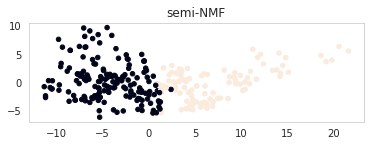

<Figure size 432x288 with 0 Axes>

In [56]:
#---------------------- Visualidsation des données:PlotClusters ---------------------------
pca2 = PCA(n_components=2)
bank_test1=pca2.fit_transform(bank_test)
fig2=plt.figure()
ax2=plt.axes()
plt.subplot(211)
plt.scatter(bank_test1[:,0],bank_test1[:,1],s=20,c=H_test[:,0])
plt.title('semi-NMF')
plt.show()
plt.savefig('semi-NMF')

Comme la définition l'indique, NMF Nonegative Matrice Faqctorization, la decomposition NMF ne marche qu'avec des matrices à valeurs positives ou nuls.
Et étant donné que nous avons des valeurs négatives dans nos données, j'ai dû modifier nos données en ajoutant une (même) valeur à tous les éléments de la
matrice, ce qui modifie le resultat, donc abérrant.

### -------- decomposition NMF ------------------------

In [158]:
#--------------- ajouter 20 à tous les elements de bank_train  
bank_train_cor=bank_train+20*np.ones(bank_train.shape)

# ----------- fonction de decomposition NMF ------------- 

def decomposition_nmf(data):
    model = NMF(n_components=2, init='random', random_state=0)
    W = model.fit_transform(data)
    H = model.components_
    return W,H
W_train_bis,H_train_bis = decomposition_nmf(bank_train_cor.T)
H_train_bis=H_train_bis.T
H_trains_bis=show_clusters(H_train_bis)
H_train_bis_vecteur=prendre_second(H_trains_bis)

puretenmf=purity_score(label_train,H_train_bis_vecteur)
print('---------------------------------------------')
print('NMF, indice externe: la pureté')
print(puretenmf)
print('---------------------------------------------')

---------------------------------------------
NMF, indice externe: la pureté
0.5609090909090909
---------------------------------------------


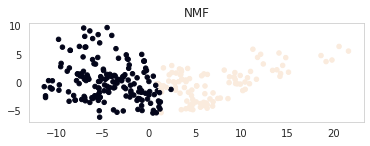

<Figure size 432x288 with 0 Axes>

In [61]:
zz=np.linalg.pinv(W_train_bis)
zz=zz.T
zz=np.asarray(z)
H_test_bis=np.dot(bank_test,zz)

H_test_bis_vect=show_clusters(H_test_bis) 
#prendre la deuxieme valeur
H_test_bis_vect=prendre_second(H_test_bis_vect)

pca3 = PCA(n_components=2)
bank_test1=pca2.fit_transform(bank_test)
fig3=plt.figure()
ax3=plt.axes()
plt.subplot(211)
plt.scatter(bank_test1[:,0],bank_test1[:,1],s=20,c=H_test_bis[:,0])
plt.title('NMF')
plt.show()
plt.savefig('NMF')

In [62]:
"""
#print('ici commence pureté H_test_bis')
purH=purity_score(label_test,H_test_bis_vect)
print(purH)
"""
print('NMF, indice externe: l''entropie')
entropi=entropy(H_test_bis_vect)
print(entropi)
print('---------------------------------------------')

NMF, indice externe: lentropie
0.6652042646399308
---------------------------------------------


In [63]:
#print('ici Davis Bouldin ')
DB=davies_bouldin_score(bank_test,H_test_bis_vect)
print('NMF, indice(interne) de Davis & Bouldin ')
print(DB)
print('---------------------------------------------')

NMF, indice(interne) de Davis & Bouldin 
0.928606027461308
---------------------------------------------


/home/yaba/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [159]:
#print('ici Calinsk Harabaz')
CH=metrics.calinski_harabaz_score(bank_test, H_test_bis_vect)
print('NMF,  indice(interne) de Calinsk & Harabaz')  
print(CH)

NMF,  indice(interne) de Calinsk & Harabaz
257.2508515614087


### ----------------------- Symetrie-NMF ------------------------------

##### -----------------matrice de gromme: K_test ,gamma=1--------------------

Dans cette partie, nous avons utilisé la définition de la symétrie NMF que nous avons découverte lors de nos documentations, cette définition de la symétrie NMF retourne un type de donnée ('tuple') avec plusieurs dimensions FAIS EN UTILISANT LE GIT https://github.com/canerturkmen/nmflib

In [147]:
def frobenius(A, B):
    return np.linalg.norm(A-B, 'fro')

class NMFResult:
    """
    Simple object for storing the results of an NMF training run
    """

    convgraph = None # an array of objective function values to plot convergence
    matrices = None # a python **list** of factorizing matrices
    objvalue = None # the final value of the objective function
    converged = None

    def __init__(self, matrices, convgraph=None, objvalue=None, converged=None):
        self.matrices = matrices
        self.convgraph = convgraph
        self.objvalue = objvalue
        self.converged = converged

def nmfcluster(don, nclus):
    pdist = 1e9 #very large number
    cl = KMeans(n_clusters=nclus).fit_predict(don)
    indices = cl
    indptr = range(len(indices)+1)
    data = np.ones(len(indices))
    H = csr_matrix((data, indices, indptr)).todense()
    D_ = np.mat(np.diag(1 / H.sum(0).astype('float64'))) # D^-1
    G = H + .2
    X = np.mat(don.T)
    XTX = X.T * X
    XTXp = (np.abs(XTX) + XTX) / 2
    XTXn = (XTX - np.abs(XTX)) / 2

    maxiter = 10000
    stopconv = 1e-4
    dist = 0
    converged = False
    convgraph = np.zeros(maxiter // 10)

    for i in range(maxiter):
        # multiplicative update step, Euclidean error reducing
        factor = np.divide(XTXp*G + G*G.T*XTXn*G, XTXn*G + G*G.T*XTXp*G)
        G = np.multiply(G, factor)
        #print(G)
        # every 10 iterations, check convergence
        if i % 10 == 0:
            dist = frobenius(X, X*G*G.T)
            #print(dist)

            convgraph[i//10] = dist
            if pdist - dist < stopconv:
                converged = True
                break
            pdist = dist

    return NMFResult((np.array(G),), convgraph, dist, converged)

In [151]:
K_test = metrics.pairwise.rbf_kernel(bank_test, gamma=1)

#----------------------- application de la symetrie-NMF --------------------
cvx = nmfcluster(K_test,2)
#cv=cvx.predict()
#matrice0 = np.asarray(cv.matrices)
#matrice0=matrice0[0]
#cvx
matrice0 = np.asarray(cvx.matrices)
matrice0 = matrice0[0]

In [152]:
#---------------- indice externe de K_test ---------------------
show=show_clusters(matrice0)
matrice0=show_clusters(matrice0) 
matrice_symetrieS_nmf=prendre_second(matrice0)
purete0=purity_score(label_test,matrice_symetrieS_nmf)
print('***************** Matrice de gram non polynomial **************')

print('---------------------------------------------')
print('Symetrie-NMF, indice externe: la pureté')
print(purete0)
print('---------------------------------------------')
print('Symetrie-NMF, indice externe: l''entropie') 
entropi0=entropy(matrice0)
print(entropi0)

***************** Matrice de gram non polynomial **************
---------------------------------------------
Symetrie-NMF, indice externe: la pureté
0.6066176470588235
---------------------------------------------
Symetrie-NMF, indice externe: lentropie
0.6931471805599445


---------------------------------------------
symetrie-NMF, indice(interne) de Davis & Bouldin 
1.328694396900898
---------------------------------------------
NMF,  indice(interne) de Calinsk & Harabaz
38.37445517114721
---------------------------------------------
*************************************************************
************* Matrices de gram polynomial *******************


/home/yaba/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


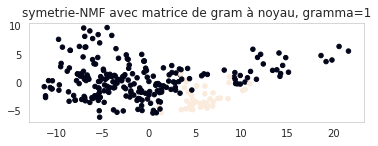

<Figure size 432x288 with 0 Axes>

In [154]:
#---------------- indice interne de K_test ---------------------
print('---------------------------------------------')
print('symetrie-NMF, indice(interne) de Davis & Bouldin ')
DB0=davies_bouldin_score(bank_test,matrice0[:,1])
print(DB0)

print('---------------------------------------------')
print('NMF,  indice(interne) de Calinsk & Harabaz')  
CH0=metrics.calinski_harabaz_score(bank_test,matrice0[:,1])  
print(CH0)
print('---------------------------------------------')
print('*************************************************************')
print('************* Matrices de gram polynomial *******************')
pca4 = PCA(n_components=2)
bank_test1=pca2.fit_transform(bank_test)
fig4=plt.figure()
ax4=plt.axes()
plt.subplot(211)
plt.scatter(bank_test1[:,0],bank_test1[:,1],s=20,c=show[:,0])
plt.title('symetrie-NMF avec matrice de gram à noyau, gramma=1')
plt.show()
plt.savefig('symetrie-NMF_avec_matrice_de_gram_à_noyau')


Dans cette partie, nous avons encore le probleme de la négativité,
ici nous avons dû ajouter jusqu'à 100000000 aux valeurs pour avoir que des valeurs positives.
L'application de show_clusters à la matrice de gram a noyau polynomial renvoie une matrice colonne avec que des 1, car la matrice renvoyé par le calcule de la matrice (de gram: polynomial_kernel) renvoie une colonne, chaque ligne est ainsi un maximum et donc show_clusters le remplace par 1.
C'est pour toutes ces raisons que les indices ne sont pas cohérents
et certains ne peuvent pas être calculés, ainsi que le problème d'affichage images. 

In [173]:
#---------------- sequence 4-a) gramma = 1----------
K_test1 = metrics.pairwise.polynomial_kernel(bank_test, gamma=1)
K_test1_bis =K_test1+100000000*np.ones(K_test1.shape)
cvx = nmfcluster(K_test1_bis,1)
matrice1 = np.asarray(cvx.matrices)
matrice1 = matrice1[0]

#print(matrice1)
matrice1=show_clusters(matrice1)

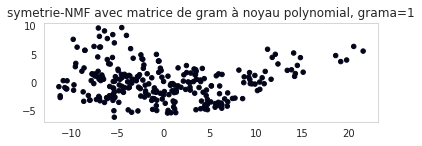

============== gramma =1 ==========================
---------------------------------------------
Symetrie-NMF, indice externe: la pureté
0.5955882352941176
---------------------------------------------
Symetrie-NMF, indice externe: lentropie
-0.0
---------------------------------------------


<Figure size 432x288 with 0 Axes>

In [163]:
#--------------les internes externe----------
pca5 = PCA(n_components=2)
bank_test1=pca2.fit_transform(bank_test)
fig5=plt.figure()
ax5=plt.axes()
plt.subplot(211)
plt.scatter(bank_test1[:,0],bank_test1[:,1],s=20,c=matrice1[:,0])
plt.title('symetrie-NMF avec matrice de gram à noyau polynomial, grama=1')
plt.show()
plt.savefig('symetrie-NMF_avec_matrice_de_gram_à_noyau_polynomial_gramm=1')
print('============== gramma =1 ==========================')

print('---------------------------------------------')
print('Symetrie-NMF, indice externe: la pureté')
purete1=purity_score(label_test,matrice1)
print(purete1)
print('---------------------------------------------')
print('Symetrie-NMF, indice externe: l''entropie') 
entropi1=entropy(matrice1)
print(entropi1)
print('---------------------------------------------')
print('======================================================')

In [172]:
#---------------- sequence 4-a) gramma = 0---------
K_test2= metrics.pairwise.polynomial_kernel(bank_test, gamma=0)
K_test2_bis =K_test2+100000000*np.ones(K_test2.shape)

cvx = nmfcluster(K_test2_bis,1)
matrice2 = np.asarray(cvx.matrices)
matrice2 = matrice2[0]
matrice2=show_clusters(matrice2) 


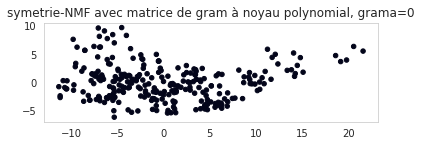

============== gramma =0 ==========================
---------------------------------------------
Symetrie-NMF, indice externe: la pureté
0.5955882352941176
---------------------------------------------
Symetrie-NMF, indice externe: lentropie
-0.0


In [165]:
#-----------visualisation
pca6 = PCA(n_components=2)
bank_test6=pca2.fit_transform(bank_test)
fig6=plt.figure()
ax6=plt.axes()
plt.subplot(211)
plt.scatter(bank_test1[:,0],bank_test1[:,1],s=20,c=matrice2[:,0])
plt.title('symetrie-NMF avec matrice de gram à noyau polynomial, grama=0')
plt.savefig('symetrie-NMF_avec_matrice_de_gram_à_noyau_polynomial_gramm=0')
plt.show()#---------------- indice externe de K_test ---------------------
print('============== gramma =0 ==========================')
print('---------------------------------------------')
print('Symetrie-NMF, indice externe: la pureté')
purete2=purity_score(label_test,matrice2)
print(purete2)
print('---------------------------------------------')
print('Symetrie-NMF, indice externe: l''entropie')
entropi2=entropy(matrice2)
print(entropi2)
print('======================================================')

In [171]:
K_test3 = metrics.pairwise.polynomial_kernel(bank_test, gamma=2)
K_test3_bis =K_test3+100000000*np.ones(K_test3.shape)
cvx = nmfcluster(K_test3_bis,1)
matrice3 = np.asarray(cvx.matrices)
matrice3 = matrice3[0]
matrice3=show_clusters(matrice3) 

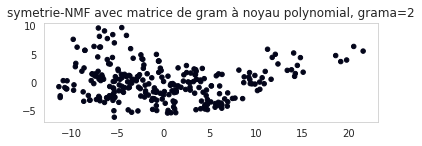

In [167]:
#--------visualisation
pca7 = PCA(n_components=2)
bank_test6=pca2.fit_transform(bank_test)
fig7=plt.figure()
ax7=plt.axes()
plt.subplot(211)
plt.scatter(bank_test1[:,0],bank_test1[:,1],s=20,c=matrice3[:,0])
plt.title('symetrie-NMF avec matrice de gram à noyau polynomial, grama=2')
plt.savefig('symetrie-NMF_avec_matrice_de_gram_à_noyau_polynomial_gramm=2')

In [170]:
#---------------- indice externe de K_test ---------------------
print('============== gramma =2 ==========================')
print('---------------------------------------------')
print('Symetrie-NMF, indice externe: la pureté')
purete3=purity_score(label_test,matrice3)
print(purete3)
print('---------------------------------------------')
print('Symetrie-NMF, indice externe: l''entropie')
entropi3=entropy(matrice3)
print(entropi3)
print('---------------------------------------------')
print('======================================================')

============== gramma =2 ==========================
---------------------------------------------
Symetrie-NMF, indice externe: la pureté
0.5955882352941176
---------------------------------------------
Symetrie-NMF, indice externe: lentropie
-0.0
---------------------------------------------
